# ADS 502 Final Project
Jose Guarneros, Nolan Peters, Sahil Wadhwa

### Data import

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from xgboost import  XGBRegressor
from xgboost import plot_importance, plot_tree, plotting
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data evaluation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ADS-502 Final Project/data/NBA_points_model.csv')

In [ ]:
df.head()

,Unnamed: 0,athlete_id,athlete_display_name,minutes,points,field_goals_attempted,field_goals_made,three_point_field_goals_made,free_throws_attempted,Team_Year,Pace,DRB%,eFG%.1,ORB%,Team_Year_player_opp,ORtg,eFG%,TOV%,eFG%_player,TS%_player
0,0,469,Rashard Lewis,9.0,3.0,2.0,1.0,1.0,0.0,Miami Heat_2014,91.2,73.0,0.511,20.6,San Antonio Spurs_2014,110.5,0.537,13.5,0.750000,0.750000
1,1,1977,Chris Bosh,39.0,13.0,14.0,6.0,0.0,2.0,Miami Heat_2014,91.2,73.0,0.511,20.6,San Antonio Spurs_2014,110.5,0.537,13.5,0.428571,0.436828
2,2,1966,LeBron James,41.0,31.0,21.0,10.0,3.0,9.0,Miami Heat_2014,91.2,73.0,0.511,20.6,San Antonio Spurs_2014,110.5,0.537,13.5,0.547619,0.620994
3,3,9,Ray Allen,31.0,5.0,8.0,1.0,1.0,2.0,Miami Heat_2014,91.2,73.0,0.511,20.6,San Antonio Spurs_2014,110.5,0.537,13.5,0.187500,0.281532
4,4,1987,Dwyane Wade,36.0,11.0,12.0,4.0,1.0,4.0,Miami Heat_2014,91.2,73.0,0.511,20.6,San Antonio Spurs_2014,110.5,0.537,13.5,0.375000,0.399709


In [ ]:
df.shape

(328236, 20)

In [ ]:
df.dtypes

Unnamed: 0                        int64
athlete_id                        int64
athlete_display_name             object
minutes                         float64
points                          float64
field_goals_attempted           float64
field_goals_made                float64
three_point_field_goals_made    float64
free_throws_attempted           float64
Team_Year                        object
Pace                            float64
DRB%                            float64
eFG%.1                          float64
ORB%                            float64
Team_Year_player_opp             object
ORtg                            float64
eFG%                            float64
TOV%                            float64
eFG%_player                     float64
TS%_player                      float64
dtype: object

In [ ]:
df.isna().sum()

Unnamed: 0                          0
athlete_id                          0
athlete_display_name                0
minutes                         57065
points                          57065
field_goals_attempted           57065
field_goals_made                57065
three_point_field_goals_made    57065
free_throws_attempted           57065
Team_Year                           0
Pace                                0
DRB%                                0
eFG%.1                              0
ORB%                                0
Team_Year_player_opp                0
ORtg                                0
eFG%                                0
TOV%                                0
eFG%_player                     70185
TS%_player                      68610
dtype: int64

In [ ]:
df[df['minutes'] >= 1.0].count()

Unnamed: 0                      269970
athlete_id                      269970
athlete_display_name            269970
minutes                         269970
points                          269970
field_goals_attempted           269970
field_goals_made                269970
three_point_field_goals_made    269970
free_throws_attempted           269970
Team_Year                       269970
Pace                            269970
DRB%                            269970
eFG%.1                          269970
ORB%                            269970
Team_Year_player_opp            269970
ORtg                            269970
eFG%                            269970
TOV%                            269970
eFG%_player                     257994
TS%_player                      259546
dtype: int64

These are the players that have played at least one minute in the season. We will only focus on players that have played at least one minute.

In [ ]:
df = df[df['minutes'] >= 1.0]
df.head()

,Unnamed: 0,athlete_id,athlete_display_name,minutes,points,field_goals_attempted,field_goals_made,three_point_field_goals_made,free_throws_attempted,Team_Year,Pace,DRB%,eFG%.1,ORB%,Team_Year_player_opp,ORtg,eFG%,TOV%,eFG%_player,TS%_player
0,0,469,Rashard Lewis,9.0,3.0,2.0,1.0,1.0,0.0,Miami Heat_2014,91.2,73.0,0.511,20.6,San Antonio Spurs_2014,110.5,0.537,13.5,0.750000,0.750000
1,1,1977,Chris Bosh,39.0,13.0,14.0,6.0,0.0,2.0,Miami Heat_2014,91.2,73.0,0.511,20.6,San Antonio Spurs_2014,110.5,0.537,13.5,0.428571,0.436828
2,2,1966,LeBron James,41.0,31.0,21.0,10.0,3.0,9.0,Miami Heat_2014,91.2,73.0,0.511,20.6,San Antonio Spurs_2014,110.5,0.537,13.5,0.547619,0.620994
3,3,9,Ray Allen,31.0,5.0,8.0,1.0,1.0,2.0,Miami Heat_2014,91.2,73.0,0.511,20.6,San Antonio Spurs_2014,110.5,0.537,13.5,0.187500,0.281532
4,4,1987,Dwyane Wade,36.0,11.0,12.0,4.0,1.0,4.0,Miami Heat_2014,91.2,73.0,0.511,20.6,San Antonio Spurs_2014,110.5,0.537,13.5,0.375000,0.399709


In [ ]:
df1 = df.copy()

In [ ]:
df1[['team', 'season']] = df1['Team_Year'].str.split('_', n=1, expand=True)
df1['season'].max()

'2023'

In [ ]:
df.shape

(269970, 20)

In [ ]:
df.isna().sum()

Unnamed: 0                          0
athlete_id                          0
athlete_display_name                0
minutes                             0
points                              0
field_goals_attempted               0
field_goals_made                    0
three_point_field_goals_made        0
free_throws_attempted               0
Team_Year                           0
Pace                                0
DRB%                                0
eFG%.1                              0
ORB%                                0
Team_Year_player_opp                0
ORtg                                0
eFG%                                0
TOV%                                0
eFG%_player                     11976
TS%_player                      10424
dtype: int64

In [ ]:
df.loc[:, 'eFG%_player'] = df['eFG%_player'].fillna(0)
df.loc[:, 'TS%_player'] = df['TS%_player'].fillna(0)

### Dataset breakdown

Target:
- Points: Total points scored by a player.

Features:
- **Pace**: an estimate of the number of possessions per 48 minutes by a team
- **ORtg**: Teams points scored per 100 possessions (opponent)
- **eFG%**: Shot making % adjusted for the fact that a 3-point field goal is worth one more point than a 2-point field goal calculated across the team (opponent).
- **TOV%**: Turnover percentage is an estimate of turnovers per 100 plays. (opponent)
- **DRB%**: Estimate of the percentage of available defensive rebounds grabbed by team.
- **ORB%**: Estimate of the percentage of available offensive rebounds grabbed by team.
- **eFG%.1**: Shot making % for oppenent adjusted for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
- **minutes**: Total minutes played by player.
- **field_goals_attempted**: Field Goal Attempts (includes both 2-point field goal attempts and 3-point field goal attempts)
- **free_throws_attempted**: Free Throw Attempts
- **eFG%_player**: Shot making % adjusted for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
- **TS%_player**: True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws for a player.


# Exploratory Data Analysis

In [ ]:
df_numeric = df.select_dtypes(include = ['number'])
df_numeric = df_numeric.drop(columns = ['Unnamed: 0', 'athlete_id'], index = 0)


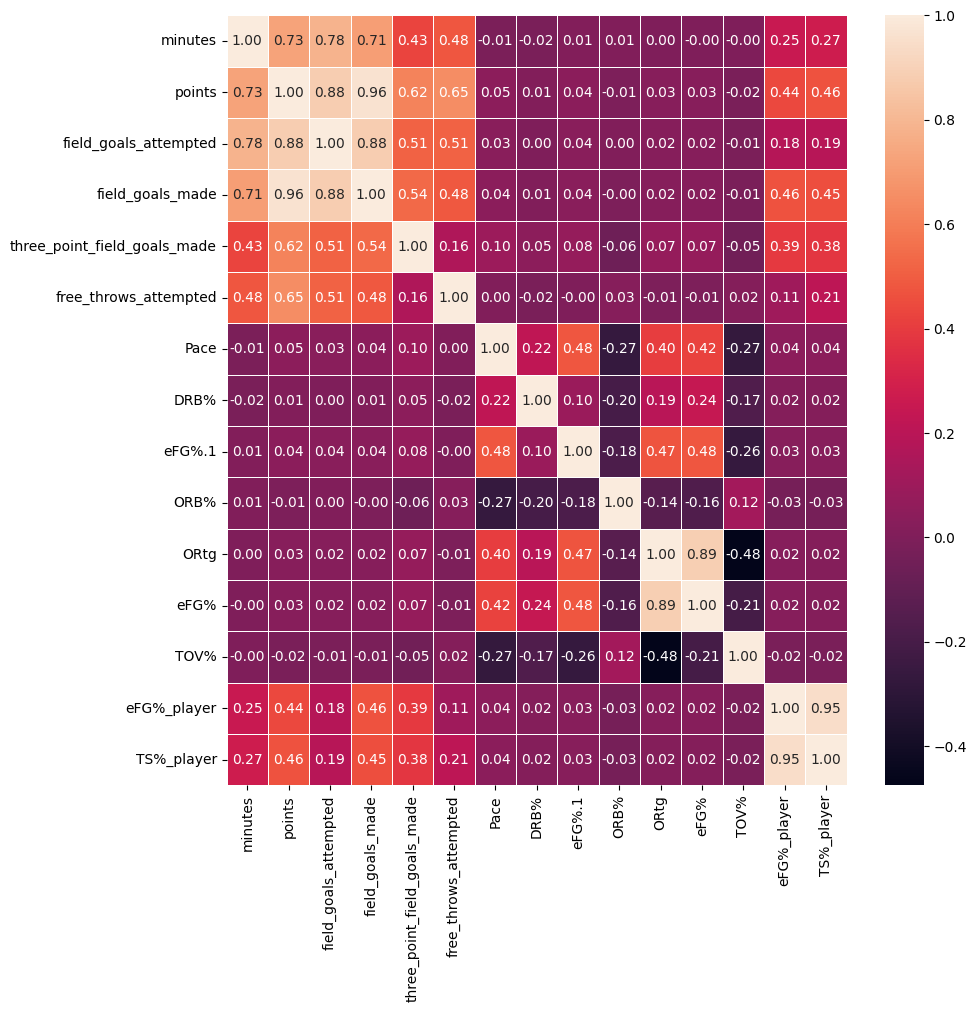

In [ ]:
#Figure 1
corr = df_numeric.corr(method = 'pearson')

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot=True,fmt=".2f", linewidth=.5);

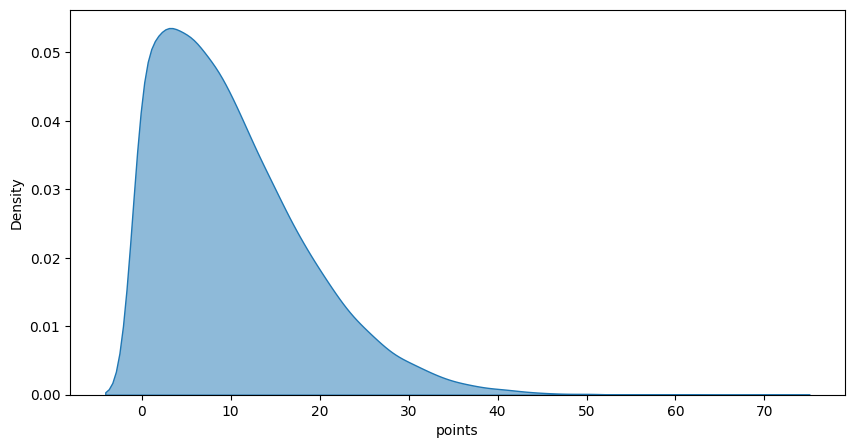

In [ ]:
#Figure 2
plt.figure(figsize = (10, 5))
sns.kdeplot(df_numeric, x = 'points', fill = True, alpha = .5, bw_adjust = 2);

In [ ]:
df_legacy = df.groupby('athlete_display_name')['minutes'].sum().reset_index()
df_legacy = df_legacy.sort_values('minutes', ascending = False).head(10)
legacy_names = df_legacy['athlete_display_name']

In [ ]:
df_legacy_1 = df.loc[df['athlete_display_name'].isin(legacy_names), :]

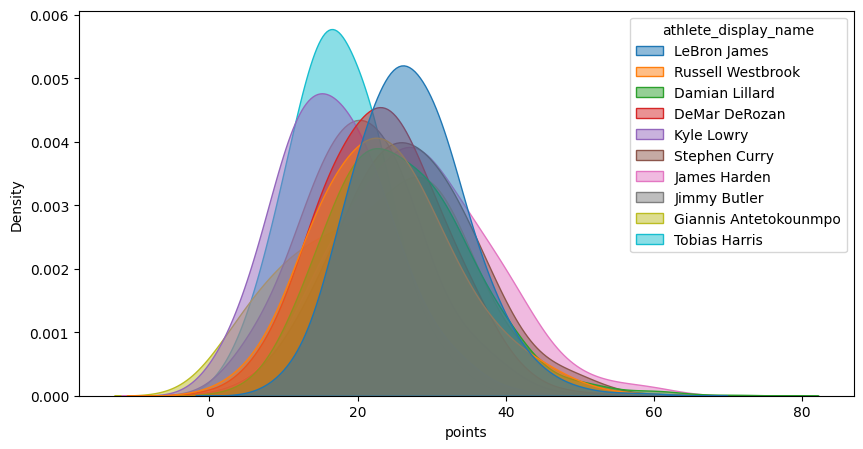

In [ ]:
#Figure 3
plt.figure(figsize = (10, 5))
sns.kdeplot(df_legacy_1, x = 'points', hue = 'athlete_display_name', fill = True, alpha = .5, bw_adjust = 1.5);

### Boxplot for the top players with the most points

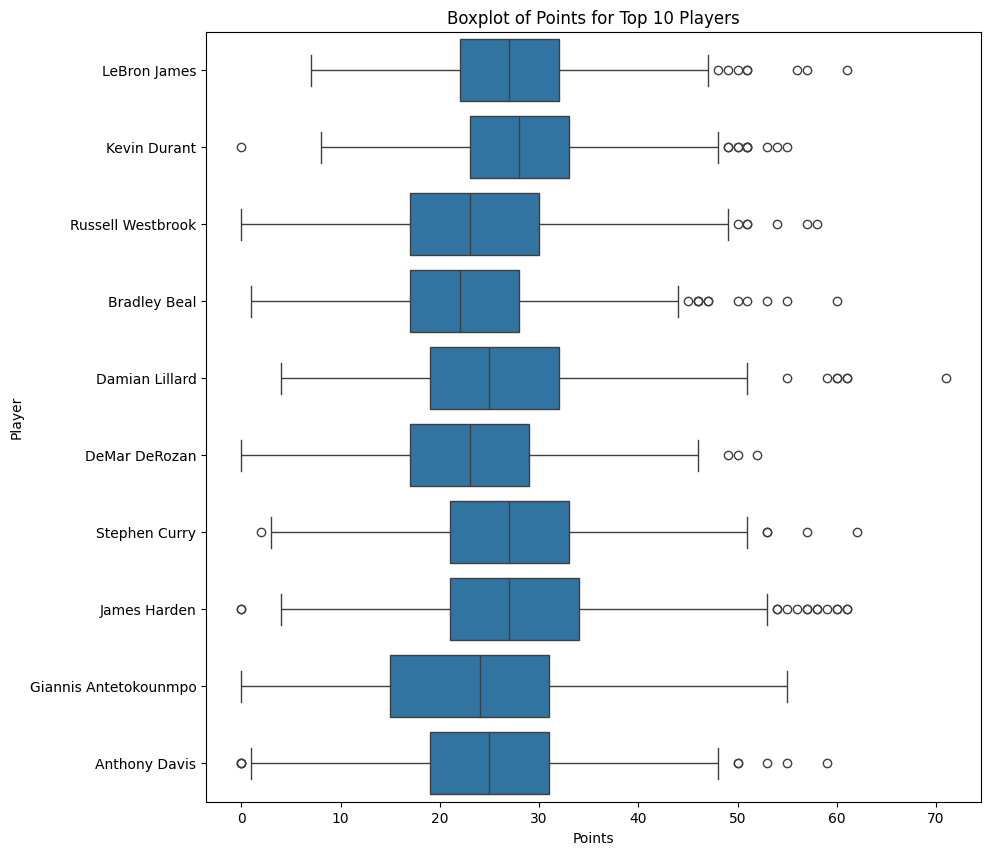

In [ ]:
#Figure 4
def create_boxplot_top_players(df, num_players=10):
    total_points_by_player = df.groupby('athlete_display_name')['points'].sum()
    top_players = total_points_by_player.nlargest(num_players)

    top_df = df[df['athlete_display_name'].isin(top_players.index)]

    # Create a boxplot using seaborn
    plt.figure(figsize=(10, 10))
    ax = sns.boxplot(data=top_df, x='points', y='athlete_display_name', orient='h')
    ax.set_xlabel('Points')
    ax.set_ylabel('Player')
    ax.set_title(f'Boxplot of Points for Top {num_players} Players')
    plt.show()

create_boxplot_top_players(df)

Text(0, 0.5, 'Total Minutes')

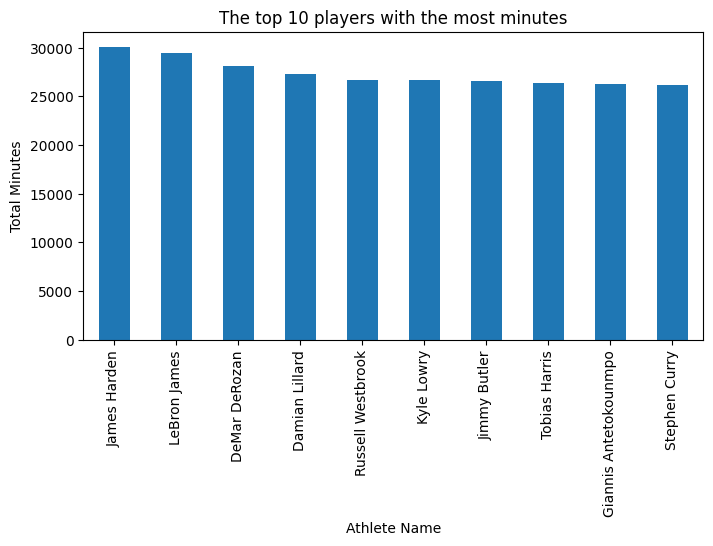

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
(df
 .groupby('athlete_display_name')['minutes']
 .sum()
 .sort_values(ascending=False)
 .head(10)
 .plot.bar(ax=ax)
 )
ax.set_title("The top 10 players with the most minutes")
ax.set_xlabel("Athlete Name")
ax.set_ylabel("Total Minutes")

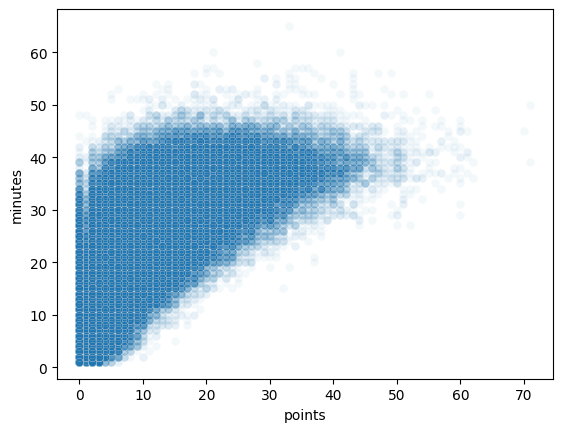

In [ ]:
#Figure 5
sns.scatterplot(df, x = 'points', y = 'minutes', alpha = .05);

In [ ]:
df['points'].head()

0     3.0
1    13.0
2    31.0
3     5.0
4    11.0
Name: points, dtype: float64

# Feature Engineering


# Model build and training stage

### Stats model

In [ ]:
import statsmodels.api as sm
from sklearn import metrics as met

In [ ]:
# X = df[['Pace', 'ORtg', 'eFG%', 'TOV%', 'DRB%', 'ORB%', 'eFG%.1', 'minutes', 'field_goals_attempted', 'free_throws_attempted', 'eFG%_player', 'TS%_player' ]]
# y = df[['points']]

In [ ]:
X = df[['Pace', 'ORtg', 'TOV%', 'DRB%', 'ORB%', 'minutes', 'TS%_player' ]]
y = df[['points']]

In [ ]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y, test_size = .25, random_state = 23)

In [ ]:
X_train_lin = sm.add_constant(X_train_lin)

In [ ]:
model_1 = sm.OLS(y_train_lin, X_train_lin).fit()

In [ ]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                 4.497e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:16:10   Log-Likelihood:            -6.2152e+05
No. Observations:              202477   AIC:                         1.243e+06
Df Residuals:                  202469   BIC:                         1.243e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.6861      0.734    -32.250      0.000     -25.126     -22.247
Pace           0.1287      0.004     29.340      0.000       0.120       0.137
ORtg           0.0121      0.003      3.703      0.000       0.006       0.019
TOV%           0.0457      0.014      3.341      0.001       0.019       0.073
DRB%           0.0321      0.006      5.036      0.000       0.020       0.045
ORB%           0.0319      0.005      6.366      0.000       0.022       0.042
minutes        0.5094      0.001    450.682      0.000       0.507       0.512
TS%_player     8.7698      0.044    199.218      0.000       8.684       8.856
==============================================================================
Omnibus:                    34839.419   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96303.098
Skew:                           0.929   Prob(JB):                         0.00
Kurtosis:                       5.822   Cond. No.                     1.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_test_lin = sm.add_constant(X_test_lin)

In [ ]:
y_pred_lin = model_1.predict(X_test_lin)

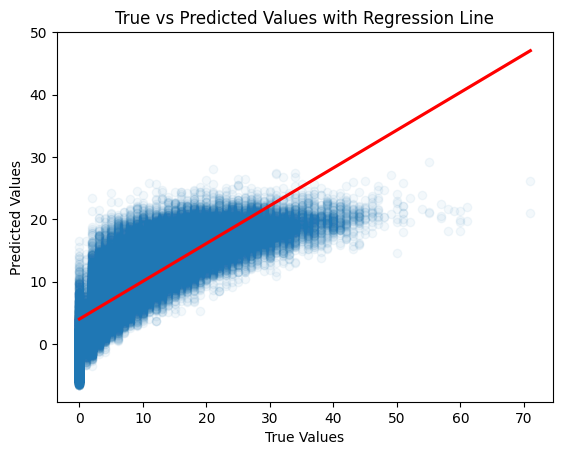

In [ ]:
plt.scatter(y_test_lin, y_pred_lin, alpha = .05)

sns.regplot(x=y_test_lin, y=y_pred_lin, scatter=False, color = 'red')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values with Regression Line');

### XGBoost model

In [ ]:
# Feature selection
features = ['Pace', 'ORtg', 'TOV%', 'DRB%', 'ORB%', 'minutes', 'TS%_player']
target_variable = ['points']
X = df[features]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 42)

parms_grid = {
    ""'"" not using this because the gridsearch takes too long to run on the default cpu. ""'""
    ""'"" attempted this. took over 30 minutes before I decided to stop the cpu ""'""

    'max_depth': [4, 5, 6],
    'min_child_weight': [6, 8, 10],
    'eta': [.1, 0.01, .001],
    'n_estimators': [200, 500, 1500],
    'subsample': [0.3, 0.5, 0.3],
    'tree_method': ['gpu_hist']}

model01 = XGBRegressor(max_depth=6, min_child_weight=8, eta=.01, n_estimators=500, subsample=.3)
## tuned_model = GridSearchCV(model01, parms_grid, cv=5, scoring="r2")
model01.fit(X_train, y_train)
## tuned_model.best_params_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=8, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model01.predict(X_test)

### RandomForest Model

In [ ]:
features_rfm = ['Pace', 'ORtg', 'TOV%', 'DRB%', 'ORB%', 'minutes', 'TS%_player']
target_rfm = ['points']

X_rfm = df[features_rfm]
y_rfm = df[target_rfm]
rfy = np.ravel(y_rfm)

X_train_rfm, X_test_rfm, y_train_rfm, y_test_rfm = train_test_split(X_rfm, rfy, test_size = .30, random_state = 42)

In [ ]:
#Params chosen by Grid Search
regr = RandomForestRegressor(max_depth=2, n_estimators = 500, random_state=0)
regr.fit(X_train_rfm, y_train_rfm)

RandomForestRegressor(max_depth=2, n_estimators=500, random_state=0)

In [ ]:
ypred_rfm = regr.predict(X_test_rfm)

## CatBoost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
features = ['Pace', 'ORtg', 'TOV%', 'DRB%', 'ORB%', 'minutes', 'TS%_player']
target_variable = ['points']
X = df[features]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 42)

cat = CatBoostRegressor(learning_rate=1,
                        depth=7,
                        iterations=200,
                        eval_metric="RMSE")

cat.fit(X_train, y_train)
cat_preds = cat.predict(X_test)

0:	learn: 4.6897055	total: 101ms	remaining: 20.2s
1:	learn: 4.5384889	total: 223ms	remaining: 22s
2:	learn: 4.4413207	total: 246ms	remaining: 16.1s
3:	learn: 4.3896441	total: 267ms	remaining: 13.1s
4:	learn: 4.3644241	total: 296ms	remaining: 11.5s
5:	learn: 4.3439997	total: 358ms	remaining: 11.6s
6:	learn: 4.3118624	total: 408ms	remaining: 11.2s
7:	learn: 4.2942018	total: 434ms	remaining: 10.4s
8:	learn: 4.2876251	total: 456ms	remaining: 9.68s
9:	learn: 4.2737379	total: 490ms	remaining: 9.31s
10:	learn: 4.2677439	total: 516ms	remaining: 8.86s
11:	learn: 4.2578511	total: 537ms	remaining: 8.42s
12:	learn: 4.2411840	total: 569ms	remaining: 8.19s
13:	learn: 4.2277587	total: 594ms	remaining: 7.9s
14:	learn: 4.2108419	total: 664ms	remaining: 8.18s
15:	learn: 4.1953875	total: 728ms	remaining: 8.37s
16:	learn: 4.1880585	total: 813ms	remaining: 8.75s
17:	learn: 4.1577951	total: 868ms	remaining: 8.78s
18:	learn: 4.1494729	total: 919ms	remaining: 8.75s
19:	learn: 4.1381381	total: 992ms	remaining:

# Model evaluation

## Metrics Evaluation

In [ ]:
def model_metrics(y_test, y_pred):

    mse = round(mean_squared_error(y_test, y_pred), 4)
    rmse = round(np.sqrt(mse), 4)
    r2 = round(r2_score(y_test, y_pred), 4)
    mae = round(mean_absolute_error(y_test, y_pred), 4)

    print(f'The mean squared error is: {mse}')
    print(f'The root mean squared error is: {rmse}')
    print(f'The R-squared is: {r2}')
    print(f'The mean absolute error is: {mae}')

    return

## XG Boost Model Evaluation


In [ ]:
model_metrics(y_test, y_pred)

The mean squared error is: 17.749
The root mean squared error is: 4.213
The R-squared is: 0.7467
The mean absolute error is: 2.7997


## Random Forest Model Evaluation

In [ ]:
model_metrics(y_test_rfm, ypred_rfm)

The mean squared error is: 29.7472
The root mean squared error is: 5.4541
The R-squared is: 0.5754
The mean absolute error is: 3.9982


## CatBoost Evaluation

In [ ]:
model_metrics(cat_preds, y_test)

The mean squared error is: 17.0381
The root mean squared error is: 4.1277
The R-squared is: 0.6931
The mean absolute error is: 2.6581


## Linear Regression

In [ ]:
model_metrics(y_test_lin, y_pred_lin)

The mean squared error is: 27.4496
The root mean squared error is: 5.2392
The R-squared is: 0.6104
The mean absolute error is: 3.9199


Text(0, 0.5, 'Features')

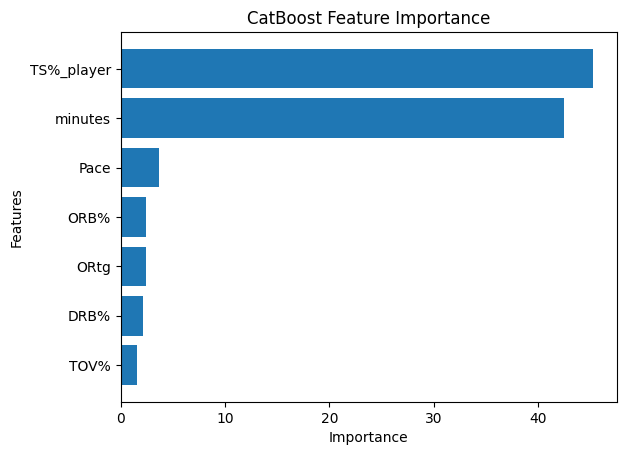

In [ ]:
importances = cat.get_feature_importance()
feature_importances = pd.Series(importances, index=X.columns).sort_values()
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

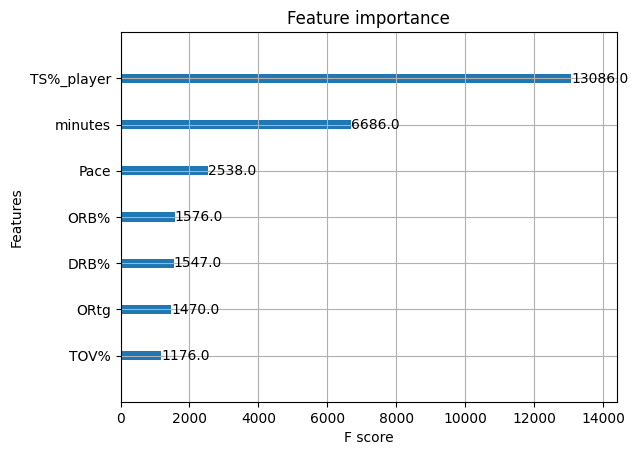

In [ ]:
plot_importance(model01)
plt.show()